<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/rgb_xyz_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-04 19:49:11--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9942 (9.7K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   9.71K  --.-KB/s    in 0s      

2022-06-04 19:49:11 (77.7 MB/s) - ‘utils.py’ saved [9942/9942]



In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [3]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

!pip install -q tensorflow-io
import tensorflow_io as tfio

from utils import ModelCreator, get_train_val_ds, ErrorAnalyzer, get_class_weight

     |████████████████████████████████| 25.9 MB 1.1 MB/s 


In [4]:
BATCH_SIZE = 32
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16
HUB_URL = 'https://tfhub.dev/google/bit/m-r50x1/1'

In [5]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [19]:
train_ds, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 16580 files belonging to 16 classes.
Found 3508 files belonging to 16 classes.


In [7]:
classes, class_weight = get_class_weight()

In [20]:
def combine_rgb_xyz(img_batch):
  img_batch_xyz = tfio.experimental.color.rgb_to_xyz(img_batch)
  return (img_batch + img_batch_xyz) / 2

In [21]:
train_ds = (
    train_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (combine_rgb_xyz(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

val_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (combine_rgb_xyz(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [ ]:
xyz_creator = ModelCreator(HUB_URL, 'RGB_XYZ-model')
xyz_model = xyz_creator.make_model(img_size=IMG_SIZE)

In [26]:
callbacks = xyz_creator.get_callbacks()

In [ ]:
history = xyz_model.fit(train_ds,
                        callbacks=callbacks,
                        epochs=15,
                        class_weight=class_weight)

Epoch 1/15
519/519 [==============================] - 1793s 3s/step - loss: 1218.3698 - auc: 0.4760 - accuracy: 0.6424
Epoch 2/15
519/519 [==============================] - 203s 388ms/step - loss: 1451.0022 - auc: 0.5461 - accuracy: 0.7037
Epoch 3/15
519/519 [==============================] - 204s 389ms/step - loss: 1361.5565 - auc: 0.6005 - accuracy: 0.7458
Epoch 4/15
519/519 [==============================] - 202s 386ms/step - loss: 1171.0002 - auc: 0.6281 - accuracy: 0.7656
Epoch 5/15
519/519 [==============================] - 207s 397ms/step - loss: 1047.7461 - auc: 0.6477 - accuracy: 0.7796
Epoch 6/15
519/519 [==============================] - 202s 386ms/step - loss: 841.7449 - auc: 0.6850 - accuracy: 0.8049
Epoch 7/15
519/519 [==============================] - 201s 383ms/step - loss: 700.3039 - auc: 0.6913 - accuracy: 0.8088
Epoch 8/15
519/519 [==============================] - 208s 398ms/step - loss: 556.1678 - auc: 0.7091 - accuracy: 0.8206
Epoch 9/15
443/519 [=================

In [ ]:
xyz_model.save_weights('drive/MyDrive/checkpoints/rgb-xyz-weights-15.h5')

In [ ]:
analyzer = ErrorAnalyzer(model=xyz_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='RGB-XYZ-model-1')

In [ ]:
analyzer.plot_confusion_mat()

In [ ]:
analyzer.evaluate_model()

In [ ]:
history = xyz_model.fit(train_ds,
                        callbacks=callbacks,
                        epochs=25,
                        initial_epoch=15,
                        class_weight=class_weight)

Epoch 16/25
519/519 [==============================] - 184s 350ms/step - loss: 36.8937 - auc: 0.8343 - accuracy: 0.8712
Epoch 17/25
519/519 [==============================] - 184s 351ms/step - loss: 31.8624 - auc: 0.8472 - accuracy: 0.8772
Epoch 18/25
519/519 [==============================] - 178s 341ms/step - loss: 28.2253 - auc: 0.8507 - accuracy: 0.8740
Epoch 19/25
519/519 [==============================] - 181s 346ms/step - loss: 23.2445 - auc: 0.8711 - accuracy: 0.8870
Epoch 20/25
519/519 [==============================] - 175s 334ms/step - loss: 20.1127 - auc: 0.8842 - accuracy: 0.8931
Epoch 21/25
519/519 [==============================] - 182s 347ms/step - loss: 17.2879 - auc: 0.8945 - accuracy: 0.8994
Epoch 22/25
519/519 [==============================] - 182s 348ms/step - loss: 15.6592 - auc: 0.8979 - accuracy: 0.8990
Epoch 23/25
519/519 [==============================] - 181s 345ms/step - loss: 14.3515 - auc: 0.9088 - accuracy: 0.9038
Epoch 24/25
519/519 [===================

In [ ]:
xyz_model.save_weights('drive/MyDrive/checkpoints/xyz-weights-25.h5')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Saving confusion matrix


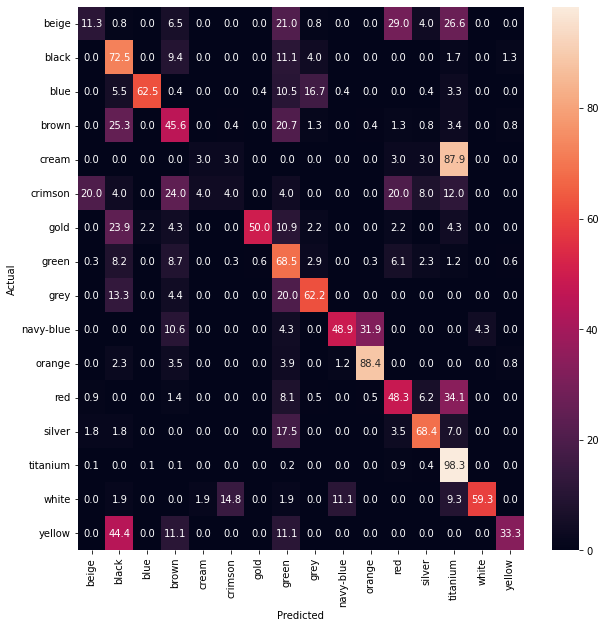

Calculating error types...
Writing in log file...
 All done. Check log file => XYZ-model-2.csv


In [ ]:
analyzer = ErrorAnalyzer(model=xyz_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='XYZ-model-2')

analyzer.plot_confusion_mat()
analyzer.evaluate_model()

In [ ]:
history = xyz_model.fit(train_ds,
                        callbacks=callbacks,
                        epochs=35,
                        initial_epoch=25,
                        class_weight=class_weight)

Epoch 26/35
519/519 [==============================] - 178s 341ms/step - loss: 11.1384 - auc: 0.9240 - accuracy: 0.9101
Epoch 27/35
519/519 [==============================] - 183s 349ms/step - loss: 10.8732 - auc: 0.9241 - accuracy: 0.9113
Epoch 28/35
519/519 [==============================] - 181s 347ms/step - loss: 9.9524 - auc: 0.9314 - accuracy: 0.9145
Epoch 29/35
519/519 [==============================] - 177s 338ms/step - loss: 9.3697 - auc: 0.9309 - accuracy: 0.9134
Epoch 30/35
519/519 [==============================] - 176s 337ms/step - loss: 8.7191 - auc: 0.9366 - accuracy: 0.9169
Epoch 31/35
519/519 [==============================] - 175s 335ms/step - loss: 8.6110 - auc: 0.9369 - accuracy: 0.9166
Epoch 32/35
519/519 [==============================] - 178s 341ms/step - loss: 8.4556 - auc: 0.9396 - accuracy: 0.9209
Epoch 33/35
519/519 [==============================] - 178s 341ms/step - loss: 8.3487 - auc: 0.9394 - accuracy: 0.9202
Epoch 34/35
519/519 [=========================

In [ ]:
xyz_model.save_weights('drive/MyDrive/checkpoints/xyz-weights-35.h5')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Saving confusion matrix


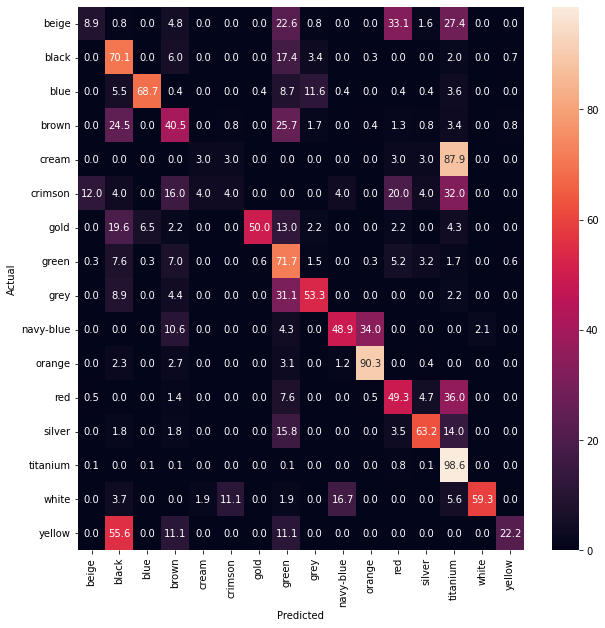

Calculating error types...
Writing in log file...
 All done. Check log file => XYZ-model-3.csv


In [ ]:
analyzer = ErrorAnalyzer(model=xyz_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='XYZ-model-3')

analyzer.plot_confusion_mat()
analyzer.evaluate_model()